# Lab 3 - Visualization

*Last update: 07/11/2022*

- Họ tên: Nguyễn Tấn Sơn
- MSSV:20120565

**Note**:

- Các bạn sẽ làm trực tiếp trên file notebook này và nộp lại duy nhất notebook trên Moodle. Trước khi nộp, **các bạn đổi tên file thành `<MSSV>.ipynb`**. Ví dụ MSSV của bạn là 1234567 thì bạn sẽ nộp file `1234567.ipynb`.
- Các bạn không tự ý thay đổi source code đã có sẵn ngoại trừ những chỗ chỉ định. Cụ thể, các bạn sẽ viết code hoặc trả lời câu hỏi ngay sau cụm `#TODO` hoặc `#TODO (optional)` trong TH không bắt buộc. 
- Các bạn nên thảo luận nhóm với nhau để tìm ra giải pháp nhưng **code và câu trả lời thì phải là của các bạn**. Mọi hình thức gian lận sẽ nhận điểm 0 cho toàn môn học.
- Các bạn được khuyến cáo vẽ lại giống biểu đồ mẫu hoặc đẹp hơn.
- Trước khi nộp bài, các bạn `Kernel` -> `Restart & Run All` sau đó lưu lại.

**Nội dung**:

- Trong bài tập này, các bạn sẽ thực hiện công việc trực quan hóa dữ liệu & kết quả. Đây là 1 trong những công đoạn hết sức quan trọng bởi nó cung cấp cho người xem cái nhìn tổng quan và trực quan về dữ liệu cũng như kết quả công việc của bạn.
- Cụ thể, bạn sẽ thực hiện:
    - Trực quan dữ liệu để tìm kiếm insights (trả lời một vài câu hỏi): Thực hiện trên tập dữ liệu giao thông.
    - Trực quan kết quả của mô hình học máy để biết mô hình chạy tốt hay không tốt: Thực hiện trên tập dữ liệu Iris.

**Yêu cầu khi trực quan hóa**:

- Mọi biểu đồ cần có tên biểu đồ, tên các trục và đơn vị (nếu có), chú thích đầy đủ cho các thành phần trong biểu đồ (nếu có).
- Các biểu đồ bạn vẽ ra không những phải đúng mà còn phải đẹp:
    - ĐÚNG thể hiện ở việc các bạn chọn đúng loại biểu đồ và tính toán chính xác các số liệu để hình thành biểu đồ. 
    - ĐẸP thể hiện ở UI/UX của biểu đồ. ĐẸP ở UI thể hiện ở việc bạn chọn màu sắc phù hợp (thư viện đã sắp xếp sẵn), layout phù hợp. ĐẸP ở UX thể hiện ở việc người xem có thể dễ dàng nắm bắt thông tin mà bạn muốn truyền đạt.

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

#TODO (optional): Import your libraries if needed

In [248]:
cd drive/MyDrive/IntroToDS/

[Errno 2] No such file or directory: 'drive/MyDrive/IntroToDS/'
/content/drive/MyDrive/IntroToDS


## 1. Trực quan hóa dữ liệu (8đ)

Giả định rằng bạn đã biết các thao tác thu thập và tiền xử lý dữ liệu. Trong bài này, bạn sẽ thực hiện các yêu cầu bên dưới về trực quan dữ liệu với 2 files:

- `./afterPreprocess.csv`: Chứa dữ liệu giao thông dạng bảng.
- `./guidance.xlsx`: Chứa thông tin về các trường dữ liệu trong `./afterPreprocess.csv`.

Mỗi yêu cầu sẽ tương ứng với 1đ. Yêu cầu 7 tương ứng 2đ.

**Yêu cầu 1**: Đầu tiên, bạn đọc file `./afterPreprocess.csv` vào dataframe `df`. In ra shape và 5 dòng đầu tiên của dữ liệu.

In [249]:
df=pd.read_csv('./afterPreprocess.csv',index_col=0)
print(df.shape)
df.head()

(13839, 9)


,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,28
1,2014-01-01,00:05:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,29
2,2014-01-01,02:20:00,Dry,Fine without high winds,Car,Driver,Slight,Female,21
3,2014-01-01,01:30:00,Wet/Damp,Fine without high winds,Car,Pedestrian,Serious,Female,34
4,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Driver,Slight,Male,34


**Yêu cầu 2**: Loại phương tiện/Kiểu thời tiết/Điều kiện mặt đường/Đối tượng tai nạn phổ biến trong các vụ tai nạn là gì?

- Tại đây, bạn sẽ thử quan sát phân bố của một vài biến category.
- Bạn hãy vẽ 4 biểu đồ cột để thể hiện tần suất xuất hiện của các loại phương tiện/thời tiết/điều kiện mặt đường/đối tượng tai nạn.
- Sắp xếp tần số theo thứ tự giảm dần (để nhấn mạnh vào những tần số có giá trị cao).

In [250]:
def BarSeries(series_,figsize_,xlabel_,ylabel_,title_,barh_=False):
  plt.figure(figsize=figsize_)
  if(barh_):
    plt.barh(series_.index,series_.values)
  else:
    plt.bar(series_.index,series_.values)
  plt.xlabel(xlabel_)
  plt.ylabel(ylabel_)
  plt.title(title_)
  plt.show()

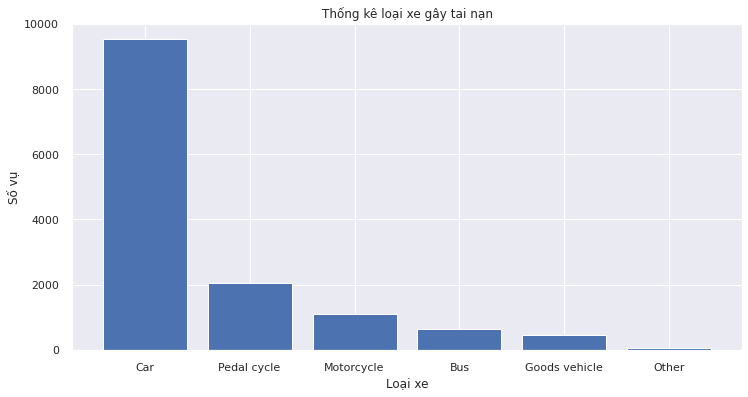

In [251]:
BarSeries(df['Type of Vehicle'].value_counts().sort_values(ascending=False),(12,6),'Loại xe','Số vụ','Thống kê loại xe gây tai nạn')

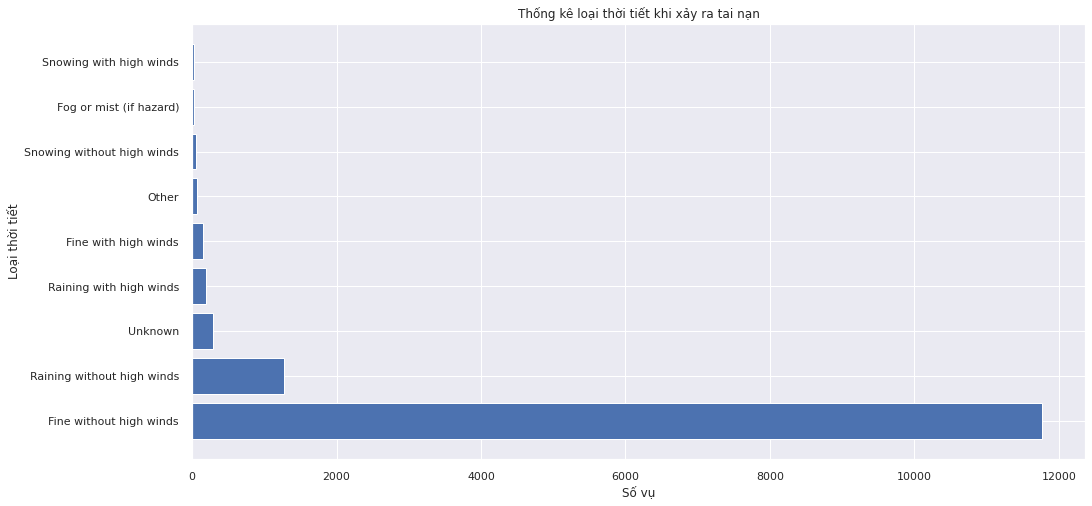

In [252]:
BarSeries(df['Weather Conditions'].value_counts().sort_values(ascending=False),(16,8),'Số vụ','Loại thời tiết','Thống kê loại thời tiết khi xảy ra tai nạn',barh_=True)

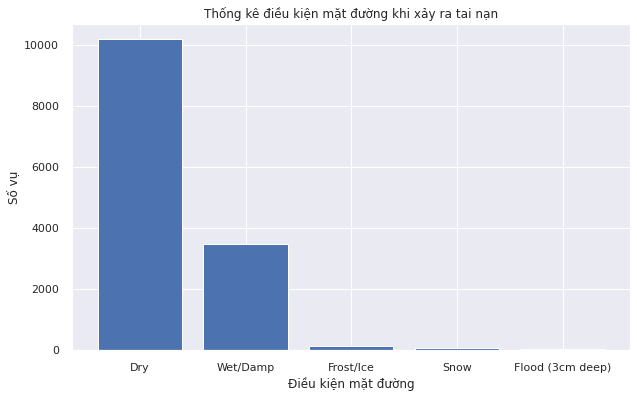

In [253]:
BarSeries(df['Road Surface'].value_counts().sort_values(ascending=False),(10,6),'Điều kiện mặt đường','Số vụ','Thống kê điều kiện mặt đường khi xảy ra tai nạn')

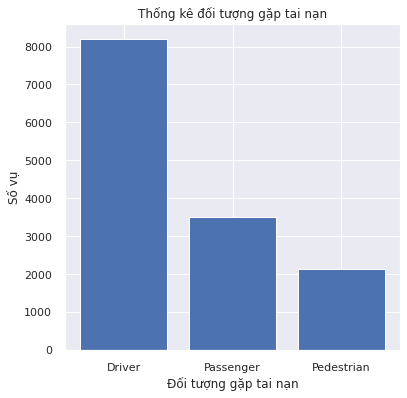

In [254]:
BarSeries(df['Casualty Class'].value_counts().sort_values(ascending=False),(6,6),'Đối tượng gặp tai nạn','Số vụ','Thống kê đối tượng gặp tai nạn')

Loại phương tiện/Kiểu thời tiết/Điều kiện mặt đường/Đối tượng tai nạn phổ biến trong các vụ tai nạn là gì? 
<br>
_ Loại phương tiện phổ biến trong các vụ tai nạn là : `Car` 
<br>
_ Kiểu thời tiết phổ biến trong các vụ tai nạn là : `Fine without high winds`
<br>
_ Điều kiện mặt đường phổ biến trong các vụ tai nạn là : `Dry`
<br>
_ Đối tượng tai nạn phổ biến trong các vụ tai nạn là : `Driver`

### 1.1. Xu hướng chung của các vụ tai nạn

**Yêu cầu 3**: Xu hướng của các vụ tai nạn theo tháng và theo năm là gì?

- Tại đây các bạn sẽ vẽ 2 group bar chart (1 theo tháng và 1 theo năm). Trong mỗi group, cần thể hiện được số lượng các ca tai nạn theo mức độ (như vậy, mỗi group sẽ có 3 cột).
- Cũng trong 2 biểu đồ trên, các bạn vẽ thêm 2 line chart thể hiện tổng số ca bị tai nạn theo tháng/năm.

In [255]:
df['Accident Date'] = pd.to_datetime(df['Accident Date']+'/'+df['Time (24hr)'], format='%Y-%m-%d/%H:%M:%S')
df.drop(['Time (24hr)'], axis=1);

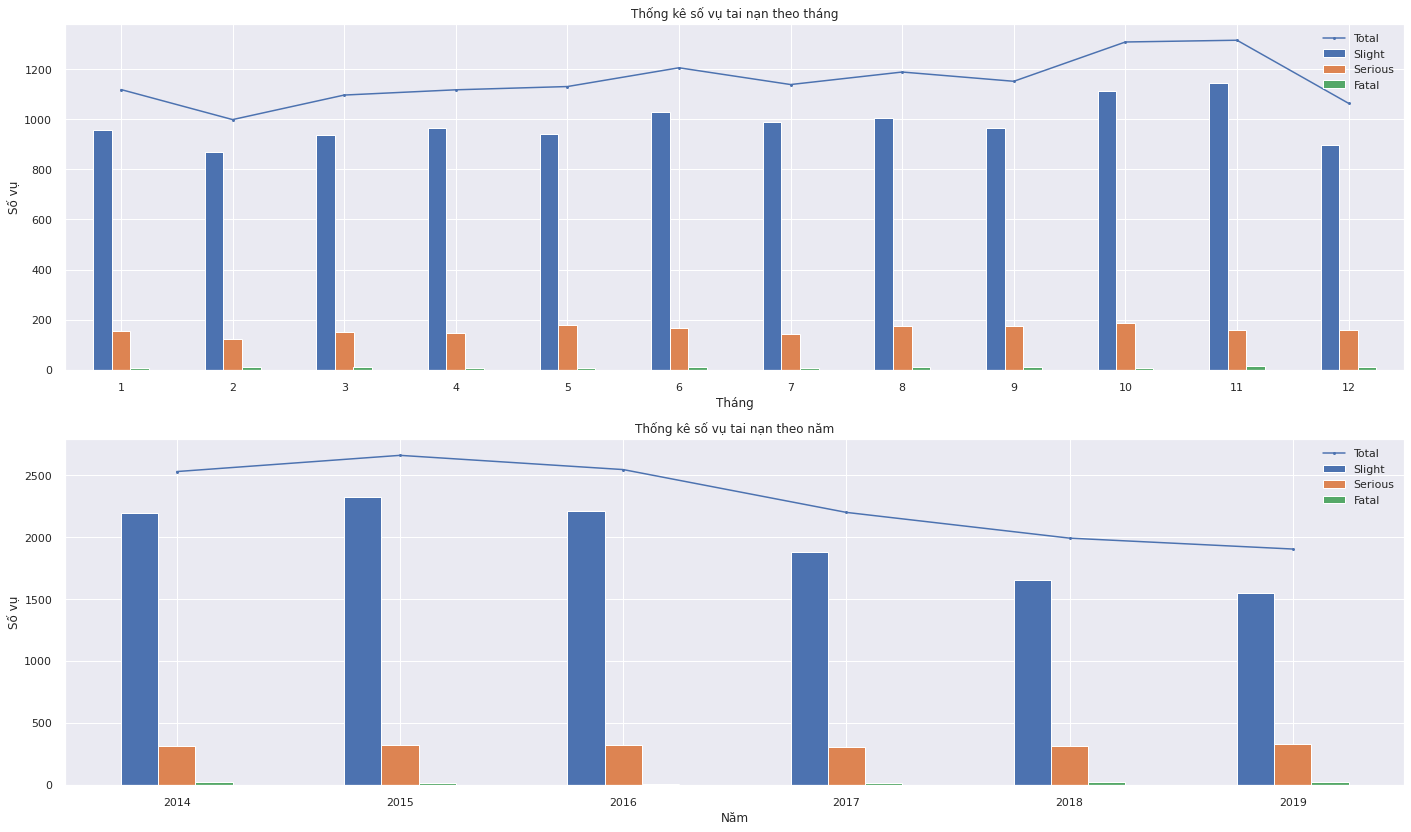

In [256]:
plt.figure(figsize=(24,14))
plt.subplot(2, 1, 1)
SplitDF=df['Casualty Severity'].groupby(df['Accident Date'].dt.month).value_counts(sort=True, ascending=True).unstack(0).T[['Slight', 'Serious', 'Fatal']]
SplitDF['Total']=SplitDF['Slight']+SplitDF['Serious']+SplitDF['Fatal']
SplitDF.index = SplitDF.index.map(str)
SplitDF.plot(ax=SplitDF['Total'].plot(kind='line',marker='.',legend=True),
y=['Slight', 'Serious', 'Fatal'],kind='bar',xlabel='Tháng',ylabel='Số vụ',title='Thống kê số vụ tai nạn theo tháng',rot=0).legend().set_title(None);

plt.subplot(2, 1, 2)
SplitDF=df['Casualty Severity'].groupby(df['Accident Date'].dt.year).value_counts(sort=True, ascending=True).unstack(0).T[['Slight', 'Serious', 'Fatal']]
SplitDF['Total']=SplitDF['Slight']+SplitDF['Serious']+SplitDF['Fatal']
SplitDF.index = SplitDF.index.map(str)
SplitDF.plot(ax=SplitDF['Total'].plot(kind='line',marker='.',legend=True),
y=['Slight', 'Serious', 'Fatal'],kind='bar',xlabel='Năm',ylabel='Số vụ',title='Thống kê số vụ tai nạn theo năm',rot=0).legend().set_title(None);


* Xu hướng của các vụ tai nạn theo tháng : Các tháng cuối mùa Thu và đầu mùa Đông. 
<br>Giải thích : 
  - Uống rượu và lái xe - Trong những tháng nghỉ lễ, người ta thường tham gia nhiều loại tiệc khác nhau có rượu bia.
  - Lái xe liều lĩnh - Tùy thuộc vào kỳ nghỉ, bạn có thể lái xe ẩu hơn nhiều.
  - Học sinh không đi học - Điều này có nghĩa là có nhiều tài xế trẻ và thiếu kinh nghiệm trên đường hơn.
  - Du lịch theo nhóm - Khi những ngày cuối năm đến gần, việc đi du lịch cùng gia đình, bạn bè tăng
* Xu hướng của các vụ tai nạn theo năm : Càng ngày càng giảm
<br>Giải thích : 
 - Những thay đổi trong thiết kế đường
 - Các chiến dịch giảm thiểu tình trạng lái xe khi say rượu và tăng cường sử  dụng dây an toàn cũng như khả năng va chạm của phương tiện
 - Một số thay đổi về thiết kế dành cho xe cộ, chẳng hạn như hệ thống chống bó cứng phanh và kiểm soát ổn định điện tử 


### 1.2. Khung giờ tai nạn trong ngày/tuần

**Yêu cầu 4**: Khung giờ nào trong ngày thường xảy ra tai nạn nhất?

- Tại đây bạn hãy vẽ biểu đồ cột thể hiện số lượng vụ tai nạn theo các khung giờ (các khoảng thời gian trong ngày).
- Các bạn tùy chọn khoảng thời gian để có minh họa tốt nhất giúp trả lời câu hỏi.

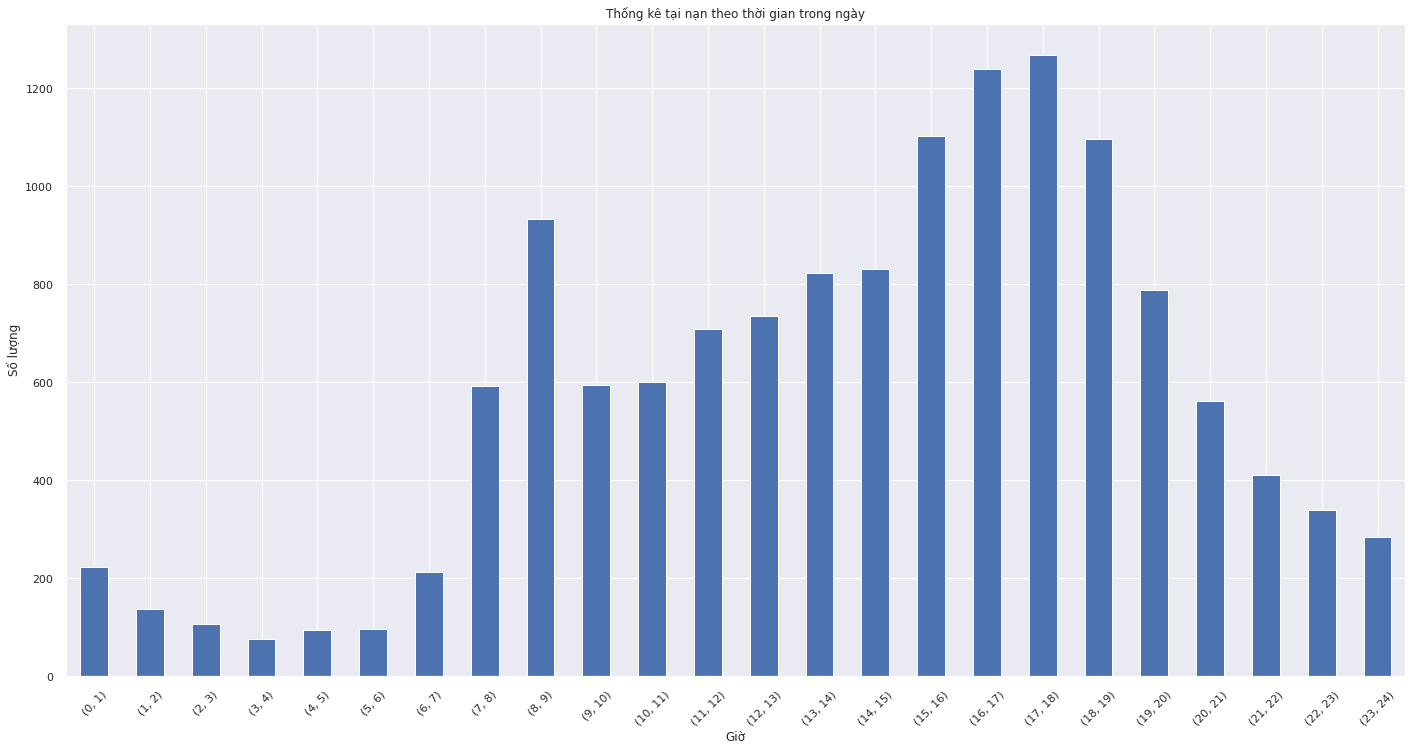

In [257]:

SplitDF=df['Accident Date'].groupby(df['Accident Date'].dt.hour).count()
SplitDF.index=list(zip(SplitDF.index,SplitDF.index+1))
SplitDF.plot(xlabel='Giờ',title='Thống kê tại nạn theo thời gian trong ngày',ylabel='Số lượng',kind='bar',rot=45,figsize=(24,12));

* Khung giờ nào trong ngày thường xảy ra tai nạn nhất : Tập trung chủ yếu từ 7h-21h. <br> giải thích :
 - Bắt đầu giờ hành chính, bắt đầu các ca làm việc và thời điêm tan tầm
 - Uống các đồ có cồn sau giờ làm việc

**Yêu cầu 5**: Yêu cầu 4 đã giúp bạn xác định khoảng thời gian thường xảy ra tai nạn. Tuy nhiên, liệu ngày nào cũng xảy ra tai nạn vào các khung giờ đó? Tại đây, bạn sẽ tìm hiểu cụ thể xem ngày nào trong tuần thì hay xảy ra tai nạn.

- Các bạn sẽ vẽ 1 heatmap với trục tung thể hiện các thứ trong tuần (từ Thứ Hai đến CN) và trục hoành thể hiện giờ trong 1 ngày (0h->23h). Màu trong mỗi cell sẽ thể hiện số lượng tai nạn. Màu càng sáng thì tai nạn càng nhiều.

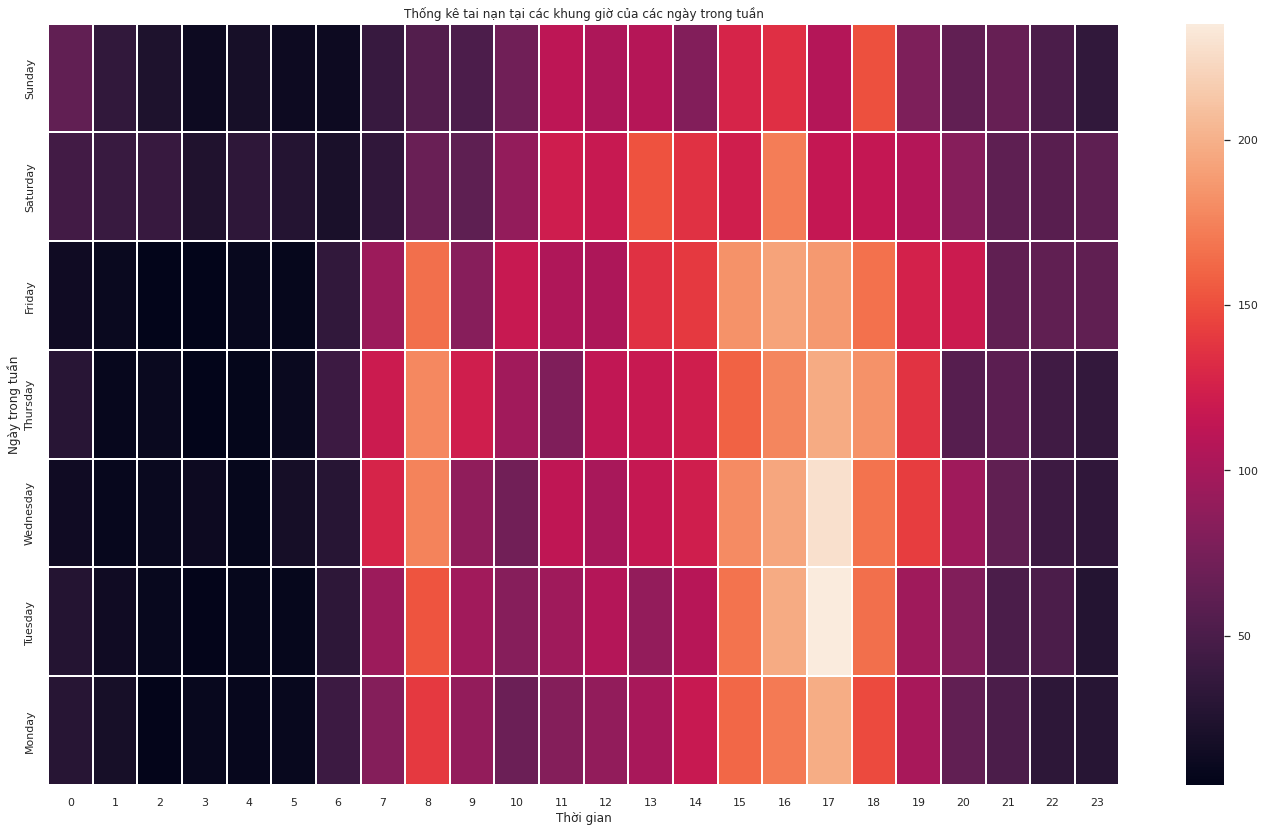

In [258]:
SplitDF=df['Accident Date'].dt.weekday.groupby(df['Accident Date'].dt.hour).value_counts(sort=False,ascending=True).unstack(0)
SplitDF.index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(24,14))
ax=sns.heatmap(SplitDF.iloc[::-1],linewidths=1)
ax.set_xlabel('Thời gian');
ax.set_ylabel('Ngày trong tuần');
ax.set_title('Thống kê tai nạn tại các khung giờ của các ngày trong tuần');

* Thứ hai tới Thứ sáu, khung giờ nào trong ngày thường xảy ra tai nạn nhất : 7-9h và 15-19h <br> giải thích :
 - Bắt đầu giờ hành chính, bắt đầu các ca làm việc và thời điêm tan tầm
* Thứ bảy và Chủ nhật có khoảng thời gian hay xảy ra tai nạn là : 11-20h <br> Giải thích :
 - Đây là những ngày nghỉ, mật độ tai nạn thấp hơn những ngày khác cũng là do người ta thường dành thời gian ở nhà

### 1.3. Chi tiết về đối tượng và mức độ tai nạn


**Yêu cầu 6**: Nhóm tuổi nào thường xuyên gây tai nạn?

- Bạn sẽ vẽ biểu đồ cột thể hiện các số lượng các vụ tai nạn gây ra bởi các nhóm tuổi khác nhau.

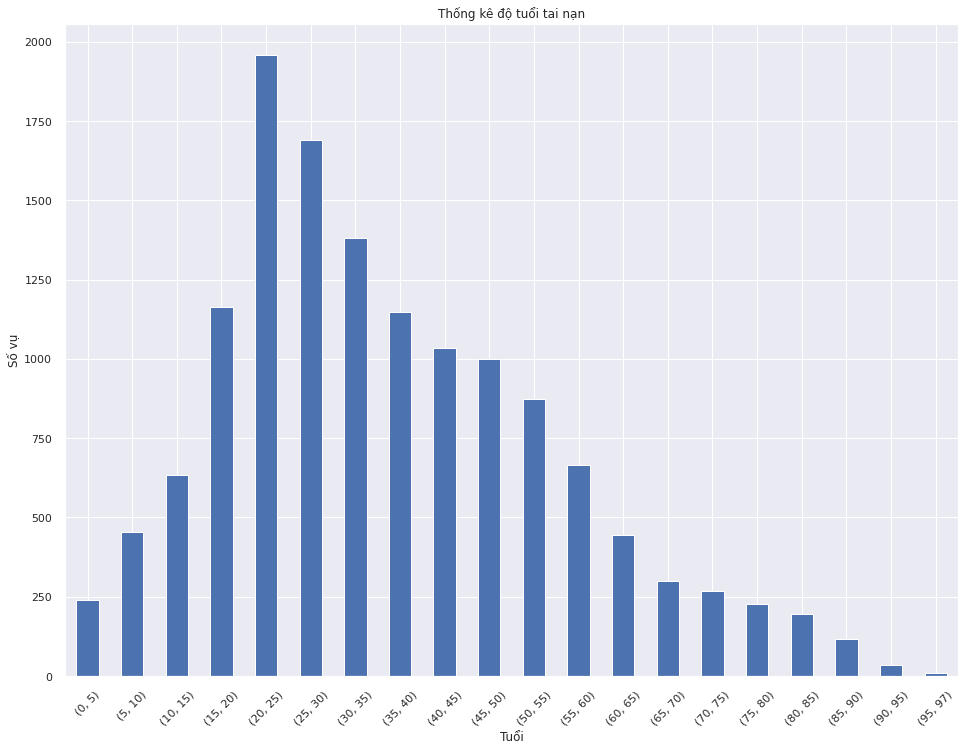

In [259]:
SplitDF=df['Age of Casualty'].value_counts().sort_index().drop([-1])
maxIndex=max(SplitDF.index)
SplitDF.index=[int(i/5) for i in SplitDF.index]
SplitSeries=pd.Series([sum(SplitDF[i]) for i in SplitDF.index.unique()],index=[(5*i,(5*(i+1) if 5*(i+1)<maxIndex else maxIndex)) for i in SplitDF.index.unique()])
SplitSeries.plot(xlabel='Tuổi',title='Thống kê độ tuổi tai nạn',ylabel='Số vụ',kind='bar',figsize=(16,12),rot=45);

* Độ tuổi hay gây ra tai nạn nhất : 15-40 tuổi <br> giải thích :
 - Độ tuổi thường xuyên sử dụng các phương tiện để đi học, đi làm việc, có nhiều nhu cầu đi chơi

**Yêu cầu 7**: Tìm hiểu mối quan hệ giữa độ tuổi, giới tính, đối tượng và mức độ nghiêm trọng trong vụ tai nạn.

- Đề xuất 1 hoặc nhiều biểu đồ giúp biểu diễn mỗi quan hệ trên.
- Biện luận các mối quan hệ trên và cho biết việc rút ra quan hệ đó có ý nghĩa gì.

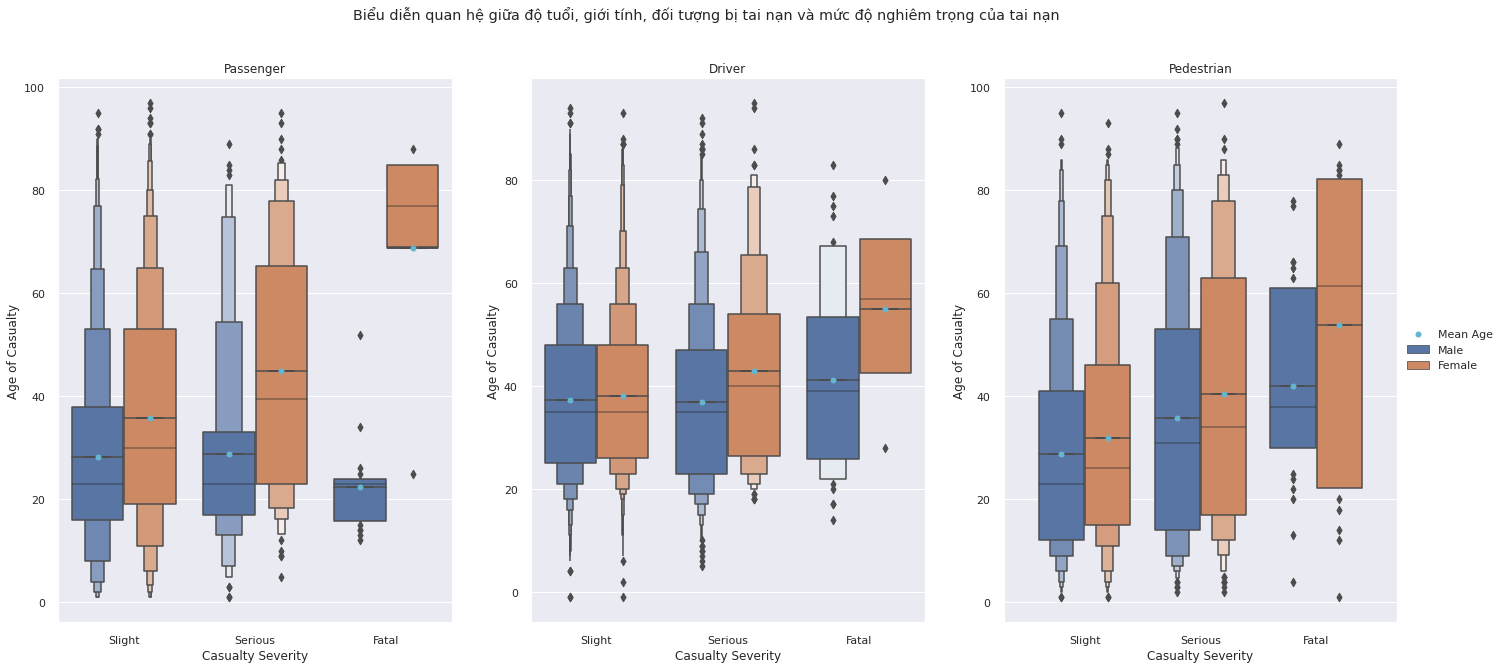

In [260]:
def drawBoxenplot(df_,ax,x_,y_,hue_,title_=""):
  df_=df_.sort_values([x_,hue_])
  ax=sns.boxenplot(ax=ax,data=df_[::-1],x=x_,y=y_,hue=hue_)
  ax.legend().remove()
  ax=sns.boxplot(ax=ax,data=df_.groupby([x_,hue_],as_index=False)[y_].mean()[::-1],x=x_,y=y_,hue=hue_,meanprops={"marker":"o","markerfacecolor":"c"},showmeans=True,showfliers = False)
  ax.set_title(title_)
  ax.legend().remove()
  plt.plot([],[],"o",label="Mean Age",color="c")
  
fig,(ax1,ax2,ax3)=plt.subplots(1, 3, figsize=(24,10))
fig.suptitle("Biểu diễn quan hệ giữa độ tuổi, giới tính, đối tượng bị tai nạn và mức độ nghiêm trọng của tai nạn")
drawBoxenplot(df[df['Casualty Class']=='Passenger'],ax1,'Casualty Severity','Age of Casualty','Sex of Casualty','Passenger')
drawBoxenplot(df[df['Casualty Class']=='Driver'],ax2,'Casualty Severity','Age of Casualty','Sex of Casualty','Driver')
drawBoxenplot(df[df['Casualty Class']=='Pedestrian'],ax3,'Casualty Severity','Age of Casualty','Sex of Casualty','Pedestrian')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='center left', bbox_to_anchor=(1, 0.5));


Biện luận các mối quan hệ trên và cho biết việc rút ra quan hệ đó có ý nghĩa gì.

## 2. Trực quan hóa kết quả (2đ)

Tại đây, các bạn sẽ thử chạy một mô hình học máy. Sau đó trực quan kết quả xem xét hiệu quả của mô hình.

### 2.1. Chạy mô hình (1đ)

Các bạn sẽ chạy mô hình gom cụm dữ liệu. Để có thể đi tiếp, bạn cần phải trang bị một vài kiến thức sau đây:

- Bài toàn học không giám sát và ý tưởng về gom cụm ([clustering](https://www.geeksforgeeks.org/clustering-in-machine-learning/)).
- Thuật toán cơ bản trong bài toán gom cụm mà chúng ta sẽ sử dụng: [KMeans](https://machinelearningcoban.com/2017/01/01/kmeans/).
- Tập dữ liệu mà bạn sẽ làm việc: [Iris](https://archive.ics.uci.edu/ml/datasets/iris).

In [261]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [262]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()

Tại đây, các bạn gom cụm với 2/4 thuộc tính của tập dữ liệu để dễ dàng cho việc trực quan hóa: `Petal length` và `Petal width`.

Text(0.5, 1.0, 'Phân lớp chính xác')

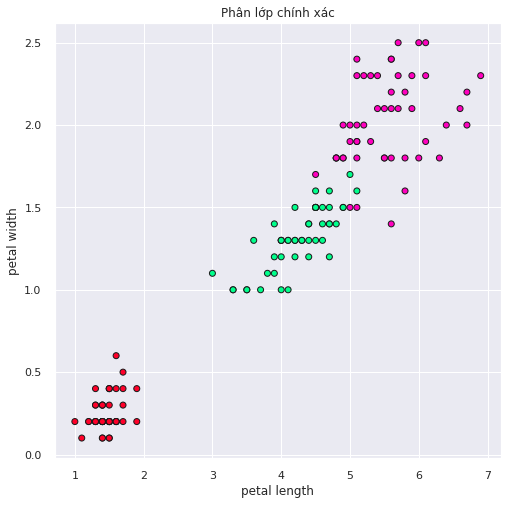

In [263]:
X = iris.data[:,2:]
y = iris.target
fig, axes = plt.subplots(figsize=(8,8))

axes.scatter(x=X[:,0], y=X[:,1], c=y, cmap='gist_rainbow', edgecolor='k')
axes.set_xlabel('petal length')
axes.set_ylabel('petal width')
axes.set_title('Phân lớp chính xác')

Lưu ý rằng: Trong bài toán gom cụm, chúng ta hoàn toàn không biết trước số cụm tối ưu. Minh họa về phân cụm tối ưu bên trên nhằm mục tiêu giúp các bạn so sánh các phân cụm mà các bạn tìm được.

Để tìm được số cụm tối ưu, chúng ta sử dụng kỹ thuật **thử và sai**. Nghĩa là bạn sẽ thử gom cụm với số cụm trong 1 khoảng xác định. Tại đây, bạn sẽ thực hiện việc này.

In [264]:
X = iris.data[:,2:]
cluster_dict={i:KMeans(n_clusters=i).fit(X).labels_ for i in range(2,11)}
print(pd.DataFrame.from_dict(cluster_dict).T)
print(pd.DataFrame.from_dict(cluster_dict).describe())

    0    1    2    3    4    5    6    7    8    9    ...  140  141  142  143  \
2     1    1    1    1    1    1    1    1    1    1  ...    0    0    0    0   
3     2    2    2    2    2    2    2    2    2    2  ...    1    1    1    1   
4     1    1    1    1    1    1    1    1    1    1  ...    0    0    2    0   
5     1    1    1    1    1    1    1    1    1    1  ...    3    3    3    2   
6     1    1    1    1    1    1    1    1    1    1  ...    2    5    5    2   
7     1    1    1    1    1    1    1    1    1    1  ...    6    6    3    6   
8     1    1    1    1    1    1    1    1    1    1  ...    3    3    5    3   
9     1    1    1    1    1    1    1    1    1    1  ...    7    7    4    2   
10    7    7    7    7    7    2    7    7    7    7  ...    3    8    1    3   

    144  145  146  147  148  149  
2     0    0    0    0    0    0  
3     1    1    1    1    1    1  
4     0    0    2    2    0    2  
5     3    3    3    3    3    3  
6     2    5  

### 2.2. Trực quan hóa kết quả (1đ)

Tiếp theo bạn sẽ thực hiện trực quan hóa kết quả gom cụm và đối chiếu với kết quả phân lớp chính xác. Từ đây, bạn có thể thấy (bằng mắt) một vài giá trị k tiềm năng. Lưu ý: Hình mẫu mà được cung cấp có 1 vài màu nhìn khá giống nhau. Các bạn hãy zoom lên để nhận biết được các màu này dễ hơn.

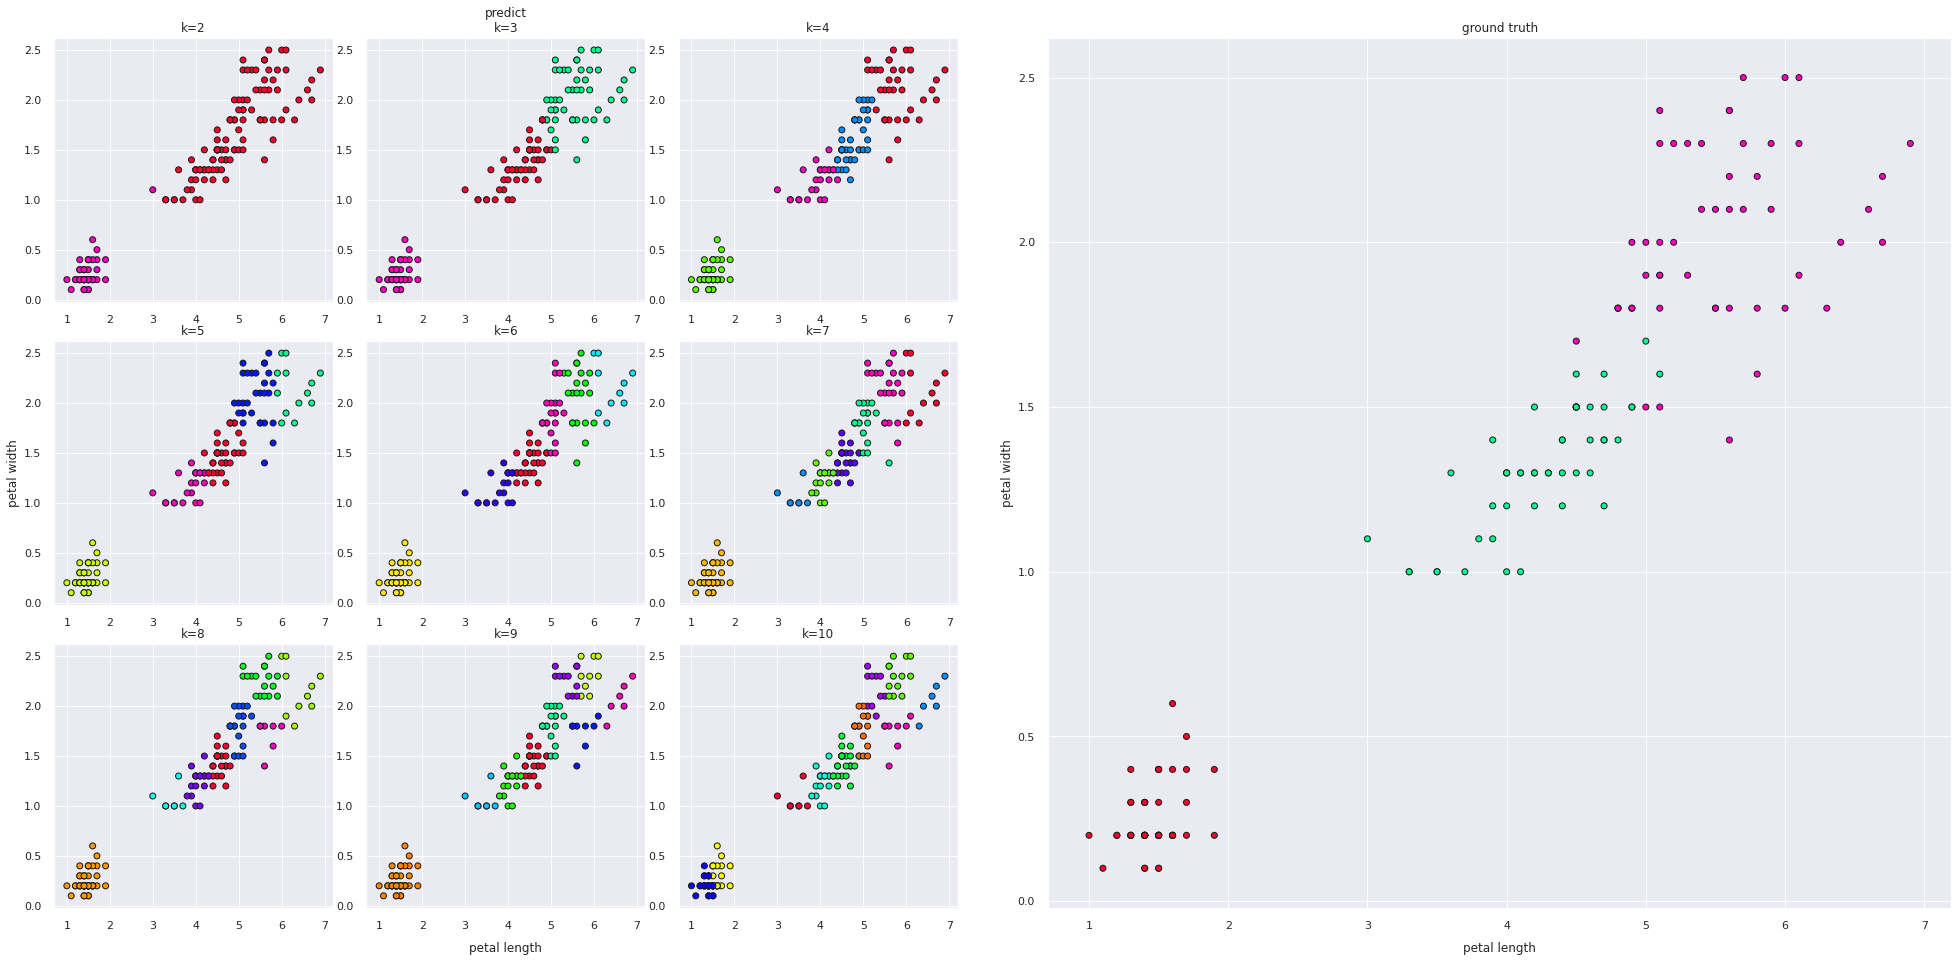

In [265]:
import matplotlib.gridspec as gridspec
def make_title_label_gridspec(outer=None,inner=None,figure=None,title=None,xlabel=None,ylabel=None):
  ax = figure.add_subplot(inner)
  ax.grid(False)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_facecolor("w")
  ax.set_title(title)
  ax.set_ylabel(ylabel)
  ax.set_xlabel(xlabel)

fig = plt.figure(figsize=(34, 16))
[outer_left,outer_right] = gridspec.GridSpec(1, 2, wspace=0.1, hspace=0)

X = iris.data[:,2:]
#left
inner = gridspec.GridSpecFromSubplotSpec(3, 3,subplot_spec=outer_left, wspace=0.12, hspace=0.15)
make_title_label_gridspec(outer=outer_left,inner=inner[::],figure=fig,title='predict\n',xlabel='\n\npetal length',ylabel='petal width\n\n')
for i in range(2,11):
    ax = plt.Subplot(fig, inner[i-2])
    ax.set_title(f'k={i}')
    y = cluster_dict[i]
    ax.scatter(x=X[:,0], y=X[:,1], c=y, cmap='gist_rainbow', edgecolor='k')
    fig.add_subplot(ax)
#right
[inner] = gridspec.GridSpecFromSubplotSpec(1,1,subplot_spec=outer_right, wspace=0.1, hspace=0.1)
make_title_label_gridspec(outer=outer_right,inner=inner,figure=fig,title='ground truth',xlabel='\n\npetal length',ylabel='petal width\n\n')
ax = plt.Subplot(fig, inner)
y = iris.target
ax.scatter(x=X[:,0], y=X[:,1], c=y, cmap='gist_rainbow', edgecolor='k')
fig.add_subplot(ax)

plt.show()

Tuy nhiên, việc kiểm tra bằng mắt đôi khi không khả thi (giả sử khi số lượng mẫu thử và sai quá lớn). Do đó, cần một độ đo để kiểm tra chất lượng gom cụm. Tiếp theo, các bạn sẽ tìm hiểu và trình bày ngắn gọn về **Elbow method**. Sau đó, bạn sẽ trực quan hóa kết quả sử dụng **Elbow method** để chọn được số cụm thích hợp.

**TODO**: Tìm hiểu và trình bày về **Elbow method**

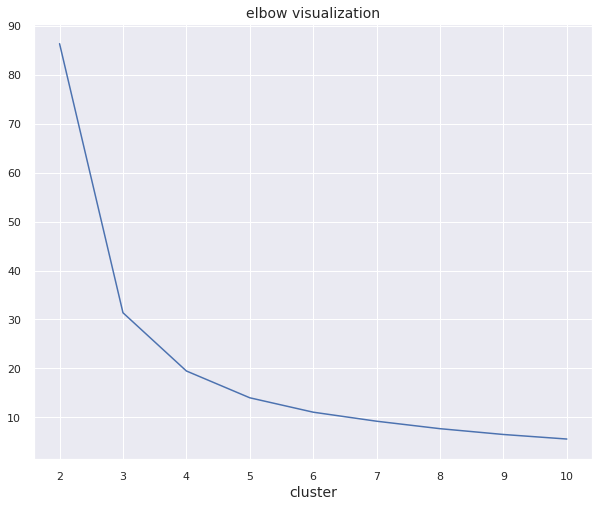

In [266]:
X = iris.data[:,2:]
cluster_dict={i:KMeans(n_clusters=i).fit(X).inertia_ for i in range(2,11)}
plt.figure(figsize=(10,8))
plt.plot(list(cluster_dict.keys()), list(cluster_dict.values()))
plt.xlabel("cluster",fontsize=14)
plt.title("elbow visualization",fontsize=14)

plt.show()

Cách lựa chọn số cụm thích hợp là ở điểm cong/khuỷu tay. Vì vậy số cụm thích hợp là 4.